Data Scientist Workshop - ex.1 - Adam Trentowski, 162602

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('D:/Projekty/DataScientistWorkshop/lab_01/files/Kruk_VLagun_156.csv')

In [3]:
dataset.shape

(156, 30)

In [4]:
dataset.describe

<bound method NDFrame.describe of           PSU     O2  SecchDisc  temp.      SS   chla   SRP   DOP     PP  \
0    3.757624   9.46       0.60   18.3   52.00  39.32   3.5  11.7  185.0   
1    3.504707   9.89       0.60   19.1   50.00  45.87   4.4  17.5  111.3   
2    3.757624   9.66       0.50   18.1   59.00  19.66   3.2  22.8  103.4   
3    3.107266  10.36       0.50   19.5   46.00  16.38   4.3  22.3   92.7   
4    2.619498  11.56       0.45   19.0   42.00   9.83  11.7  30.3   73.2   
..        ...    ...        ...    ...     ...    ...   ...   ...    ...   
151  4.500000   9.93       0.25   16.3  117.50  36.86  23.9  30.3  191.5   
152  4.600000  10.02       0.25   16.2  115.00  40.96  31.4  32.4   37.8   
153  4.500000   9.93       0.27   16.3  113.75  40.96   7.1  20.6  223.2   
154  4.200000  10.30       0.27   16.0  102.50  49.15  19.5  58.8   97.1   
155  4.100000  10.10       0.25   16.0  120.00  61.43  14.9   9.0  235.6   

        TP  ...     DOC     TPOC  PhytoBiomassC  Cyan

Prediction of visibility in water (SecchDisc - y) in water based on suspension concentration (SS - x)

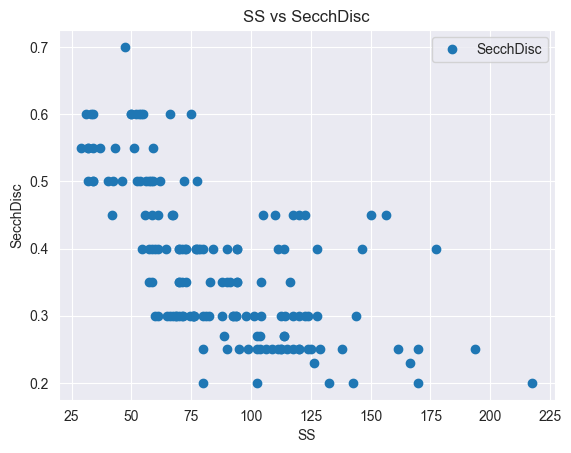

In [5]:
dataset.plot(x="SS", y="SecchDisc", style='o')
plt.title("SS vs SecchDisc")
plt.xlabel("SS")
plt.ylabel("SecchDisc")
plt.show()

<Axes: xlabel='SecchDisc', ylabel='Count'>

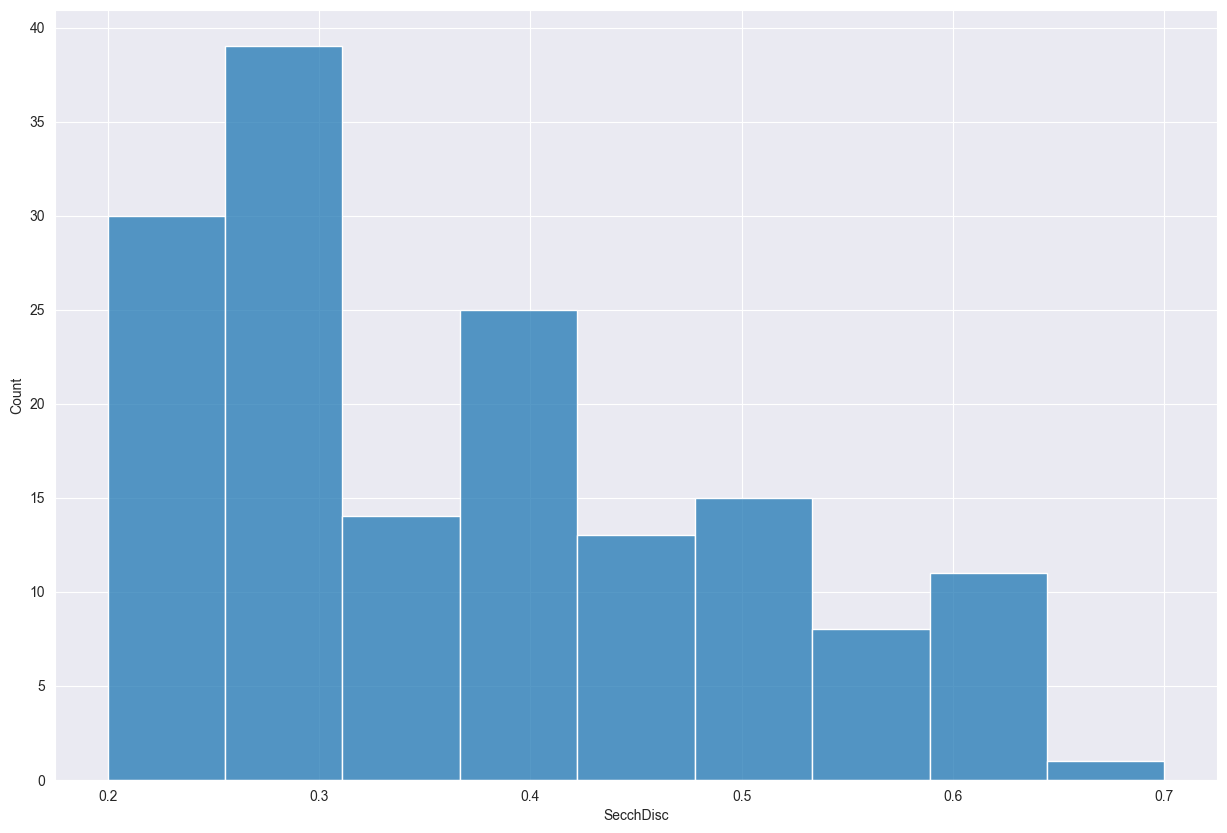

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.histplot(dataset['SecchDisc'])

In [7]:
X = dataset['SS'].values.reshape(-1, 1)
y = dataset['SecchDisc'].values.reshape(-1, 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
print(regressor.intercept_)  # intercept

[0.55338577]


In [11]:
print(regressor.coef_)  # regressor coefficient

[[-0.00201303]]


In [12]:
y_pred = regressor.predict(X_test)

In [13]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.50,0.397376
1,0.30,0.400979
2,0.40,0.432604
3,0.23,0.218720
4,0.70,0.457767
5,0.50,0.436630
6,0.30,0.409595
7,0.20,0.347050
8,0.30,0.420023
9,0.40,0.383708


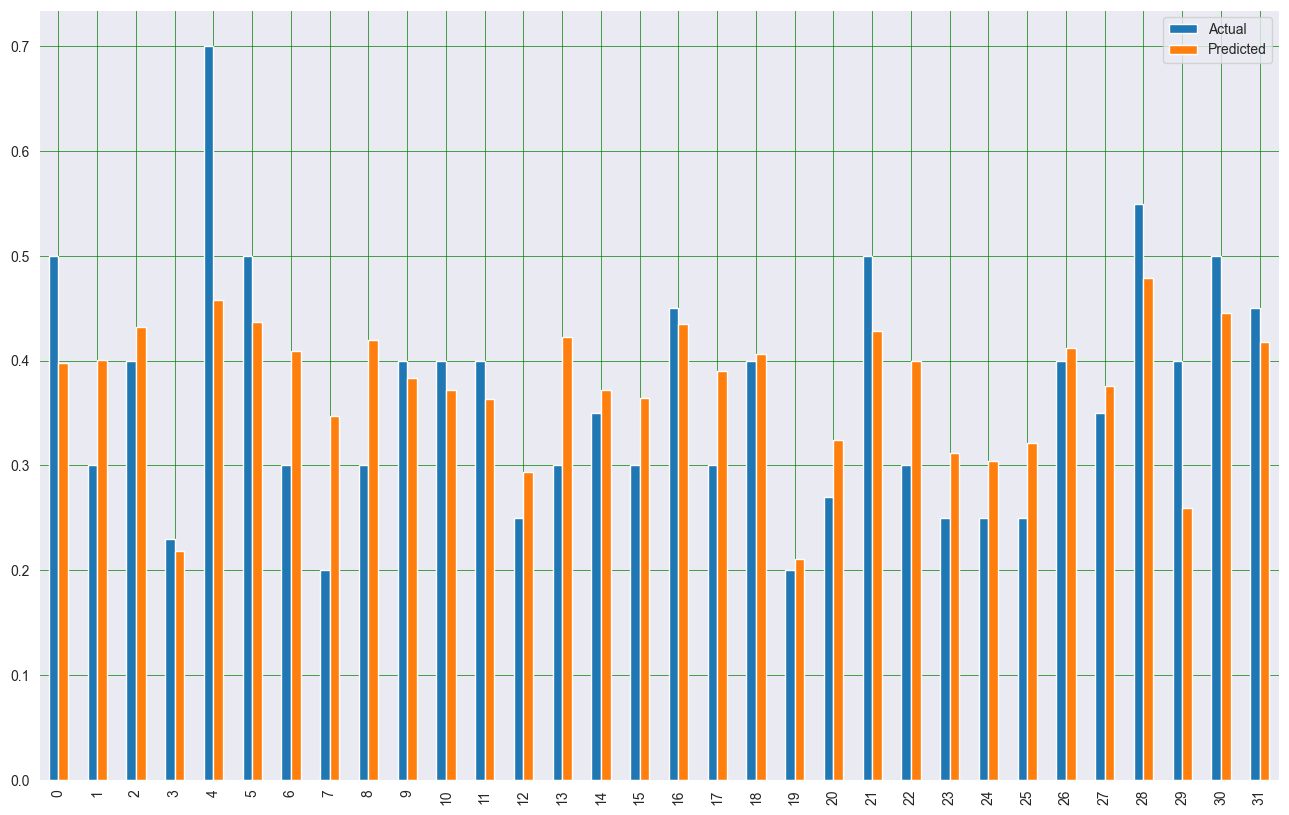

In [14]:
df.plot(kind="bar", figsize=(16,10))
plt.grid(which="major", linestyle='-', linewidth='0.5', color="green")
plt.grid(which="minor", linestyle=':', linewidth='0.5', color="black")
plt.show()

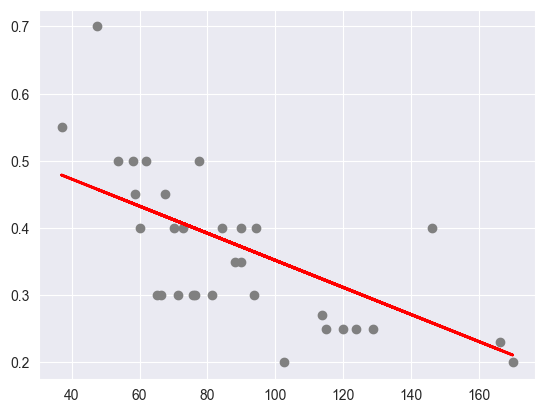

In [15]:
plt.scatter(X_test, y_test, color="gray")
plt.plot(X_test, y_pred, color="red", linewidth=2)
plt.show()

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.06680798903466384
Mean Squared Error: 0.00702853326805623
Root Mean Squared Error: 0.08383634813167991
